In [2]:
import json

JSON_FILE = 'results.json'

data = json.load(open(JSON_FILE))
data = data['VGG11']["_DeepLiftShap"]

layers = list(data.keys())
layers.sort(key=lambda x: int(x.split('.')[-1]))
print(layers)

avg_drop = [data[layer]['avg_drop'] for layer in layers]
increase = [data[layer]['increase'] for layer in layers]
insertion_curve_AUC = [data[layer]['insertion_curve_AUC'] for layer in layers]
deletion_curve_AUC = [data[layer]['deletion_curve_AUC'] for layer in layers]

['features.0', 'features.1', 'features.2', 'features.3', 'features.4', 'features.5', 'features.6', 'features.7', 'features.8', 'features.9', 'features.10', 'features.11', 'features.12', 'features.13', 'features.14', 'features.15', 'features.16', 'features.17', 'features.18', 'features.19', 'features.20']


In [3]:
import sys
sys.path.append('../')

from models import vgg11_PascalVOC
model = vgg11_PascalVOC()

layer_types = []
for i, layer in enumerate(layers):
    layer_type = model.features[int(layer.split(".")[-1])].__class__.__name__
    if layer_type not in layer_types:
        layer_types.append(layer_type)

layer_types

['Conv2d', 'ReLU', 'MaxPool2d']

In [4]:
model.features

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU(inplace=True)
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU(inplace=True)
  (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (9): ReLU(inplace=True)
  (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (12): ReLU(inplace=True)
  (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (14): ReLU(inplace=True)
  (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (16): Conv2d(512, 512, kernel_size=(3, 3), stride=

For inserion curve AUC and deletion curve AUC, the paper don't provide average values for the whole datasets, but only provides 2 simple examples with very different values (Fig. 3)

In [8]:
# PAPER VALUES

PAPER_AVG_DROP = 13.2
PAPER_INCREASE = 32.7

PAPER_DELETION_CURVE_AUC = 1.71 / 100
PAPER_INSERTION_CURVE_AUC = 60.2 / 100

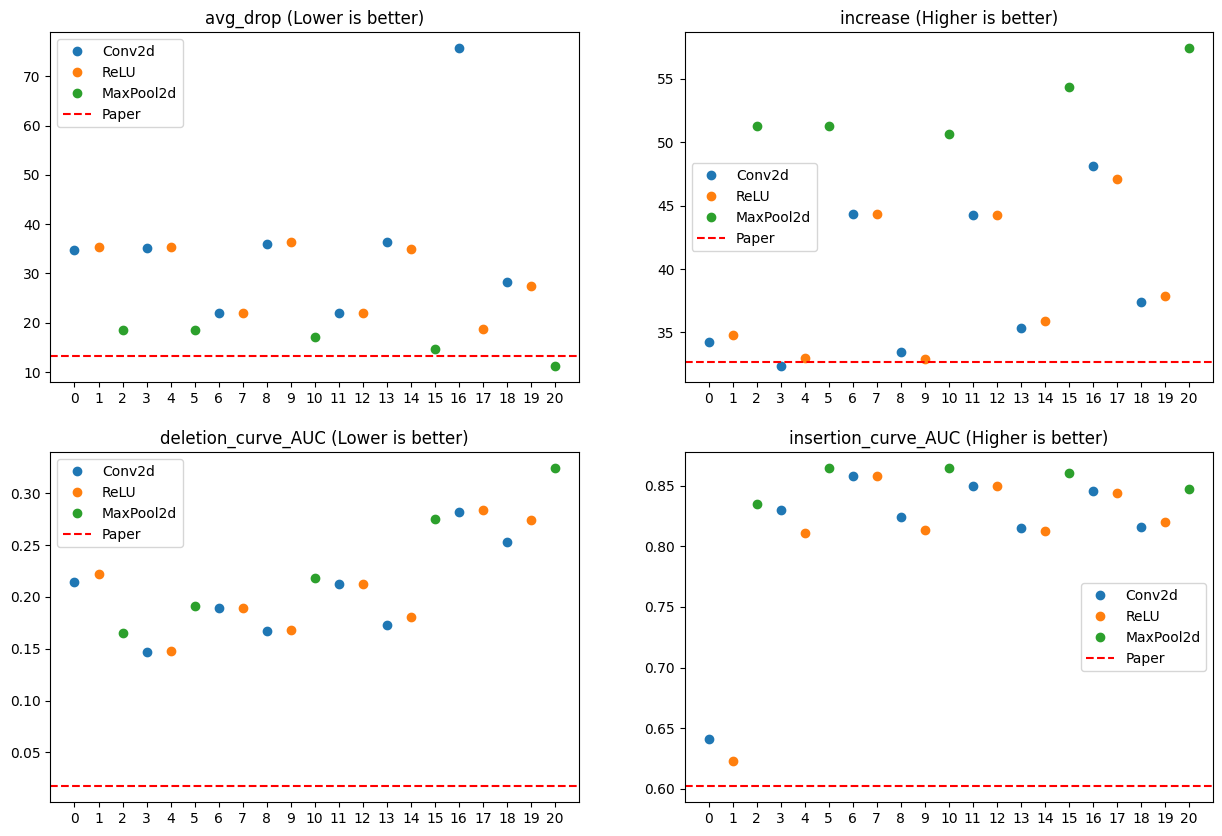

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
for layer_type in layer_types:
    indices = [i for i, layer in enumerate(layers) if model.features[int(layer.split(".")[-1])].__class__.__name__ == layer_type]
    plt.plot(indices, [avg_drop[i] for i in indices], "o", label=layer_type)

plt.xticks(range(len(layers)))
plt.axhline(y=PAPER_AVG_DROP, color='r', linestyle='--', label='Paper')
plt.title('avg_drop (Lower is better)')
plt.legend()

plt.subplot(2,2,2)
for layer_type in layer_types:
    indices = [i for i, layer in enumerate(layers) if model.features[int(layer.split(".")[-1])].__class__.__name__ == layer_type]
    plt.plot(indices, [increase[i] for i in indices], "o", label=layer_type)

plt.xticks(range(len(layers)))
plt.axhline(y=PAPER_INCREASE, color='r', linestyle='--', label='Paper')
plt.title('increase (Higher is better)')
plt.legend()

plt.subplot(2,2,3)
for layer_type in layer_types:
    indices = [i for i, layer in enumerate(layers) if model.features[int(layer.split(".")[-1])].__class__.__name__ == layer_type]
    plt.plot(indices, [deletion_curve_AUC[i] for i in indices], "o", label=layer_type)

plt.xticks(range(len(layers)))
plt.axhline(y=PAPER_DELETION_CURVE_AUC, color='r', linestyle='--', label='Paper')
plt.title('deletion_curve_AUC (Lower is better)')
plt.legend()

plt.subplot(2,2,4)
for layer_type in layer_types:
    indices = [i for i, layer in enumerate(layers) if model.features[int(layer.split(".")[-1])].__class__.__name__ == layer_type]
    plt.plot(indices, [insertion_curve_AUC[i] for i in indices], "o", label=layer_type)

plt.xticks(range(len(layers)))
plt.axhline(y=PAPER_INSERTION_CURVE_AUC, color='r', linestyle='--', label='Paper')
plt.title('insertion_curve_AUC (Higher is better)')
plt.legend()